##TODO:


outliers isolation

graphs (3.g. scatterplot matrix)

correlation matrix


correlations w/out outliers


operations btwn cols


group continuous features (e.g. price range)

In [71]:
from base_data_handler import BaseDataHandler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [72]:
file_path = "Cars Datasets 2025.csv"
handler = BaseDataHandler(file_path, encoding='latin-1')

## Dataframe:

In [73]:
handler.print_dataframe()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


## Describe:

In [74]:
handler.df.describe()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
count,1218,1218,1218,1215,1218,1218,1212,1218,1218,1218,1217
unique,37,1201,356,311,456,114,180,535,23,19,263
top,Nissan,Polo BlueMotion,I4,1984 cc,355 hp,250 km/h,6.5 sec,"$35,000",Petrol,5,400 Nm
freq,149,2,64,31,23,145,45,36,871,692,72


## Null Handle:

In [75]:
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [76]:
handler.df.dropna(inplace=True)
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1210 non-null   object
 1   Cars Names                 1210 non-null   object
 2   Engines                    1210 non-null   object
 3   CC/Battery Capacity        1210 non-null   object
 4   HorsePower                 1210 non-null   object
 5   Total Speed                1210 non-null   object
 6   Performance(0 - 100 )KM/H  1210 non-null   object
 7   Cars Prices                1210 non-null   object
 8   Fuel Types                 1210 non-null   object
 9   Seats                      1210 non-null   object
 10  Torque                     1210 non-null   object
dtypes: object(11)
memory usage: 113.4+ KB


In [77]:
s, clean_df = handler.try_clean_column_names()

# Data Cleaning
## Fuel Types normalization as strings: stripping and sorting

In [78]:
#visualization
group_df = clean_df.groupby("fuel_types").count()
group_df.head(200)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,seats,torque
fuel_types,,,,,,,,,,
CNG/Petrol,1,1,1,1,1,1,1,1,1,1
Diesel,102,102,102,102,102,102,102,102,102,102
Diesel/Petrol,4,4,4,4,4,4,4,4,4,4
Electric,95,95,95,95,95,95,95,95,95,95
Gas / Hybrid,1,1,1,1,1,1,1,1,1,1
Hybrid,79,79,79,79,79,79,79,79,79,79
Hybrid (Gas + Electric),1,1,1,1,1,1,1,1,1,1
Hybrid (Petrol),4,4,4,4,4,4,4,4,4,4
Hybrid / Plug-in,1,1,1,1,1,1,1,1,1,1


In [79]:
col = "fuel_types"

clean_df = handler.df.copy()
clean_df[col] = (
    handler.df[col]
    .astype(str)              # ensure strings
    .str.strip()              # remove leading/trailing whitespace
    .str.replace(r"\s+", " ", regex=True)  # normalize multiple spaces
    .str.title()              # consistent capitalization
)


clean_df[col] = clean_df[col] = (
    clean_df[col]
    .astype(str)
    .str.replace(r"[\/\(\)]", ",", regex=True)  # replace / ( ) with commas
)

clean_df[col] = clean_df[col].str.replace(r"[\s-]+", " ", regex=True).str.strip()
clean_df[col] = clean_df[col].str.replace("Plug In", "", regex=True).str.strip()
clean_df[col] = clean_df[col].str.replace("Hyrbrid", "Hybrid", regex=True).str.strip()

clean_df[col] = (
    clean_df[col]
    .str.split(",")
    .apply(lambda parts: ", ".join(sorted([p.strip().title() for p in parts if p.strip()])))
)

mask = clean_df[col].str.contains("Gas|Electric, Hybrid|Awd|Cng", case=False, na=False)

# Keep only rows that do NOT match any of those patterns
clean_df = clean_df[~mask]



#visualization
group_df = clean_df.groupby(col).count()
group_df.head(200)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,seats,torque
fuel_types,,,,,,,,,,
Diesel,102,102,102,102,102,102,102,102,102,102
"Diesel, Petrol",23,23,23,23,23,23,23,23,23,23
Electric,95,95,95,95,95,95,95,95,95,95
"Ev, Petrol",1,1,1,1,1,1,1,1,1,1
Hybrid,86,86,86,86,86,86,86,86,86,86
"Hybrid, Petrol",23,23,23,23,23,23,23,23,23,23
Hydrogen,3,3,3,3,3,3,3,3,3,3
Petrol,871,871,871,871,871,871,871,871,871,871


## Cleaning and striping Company Names

In [80]:
col = "company_names"

clean_df = clean_df.copy()
clean_df[col] = (
    clean_df[col]
    .astype(str)              # ensure strings
    .str.strip()              # remove leading/trailing whitespace
    .str.replace(r"\s+", " ", regex=True)  # normalize multiple spaces
    .str.title()              # consistent capitalization
)

group_df = clean_df.groupby(col).count()
group_df.head(200)


,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
company_names,,,,,,,,,,
Acura,27,27,27,27,27,27,27,27,27,27
Aston Martin,11,11,11,11,11,11,11,11,11,11
Audi,21,21,21,21,21,21,21,21,21,21
Bentley,1,1,1,1,1,1,1,1,1,1
Bmw,41,41,41,41,41,41,41,41,41,41
Bugatti,10,10,10,10,10,10,10,10,10,10
Cadillac,20,20,20,20,20,20,20,20,20,20
Chevrolet,58,58,58,58,58,58,58,58,58,58
Ferrari,9,9,9,9,9,9,9,9,9,9


## Cleaning cars_prices column

In [81]:
col = "cars_prices"

group_df = clean_df.groupby(col).count()
group_df.head(1500)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,fuel_types,seats,torque
cars_prices,,,,,,,,,,
"$1,000,000",1,1,1,1,1,1,1,1,1,1
"$1,100,000",4,4,4,4,4,4,4,4,4,4
"$1,300,000",1,1,1,1,1,1,1,1,1,1
"$1,700,000",1,1,1,1,1,1,1,1,1,1
"$10,000",2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
"$98,000",1,1,1,1,1,1,1,1,1,1
"$98,300",2,2,2,2,2,2,2,2,2,2
"$98,490",1,1,1,1,1,1,1,1,1,1


In [82]:
handler.try_init_df(clean_df)
handler.try_clean_string_to_number_col(col)

clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.sort_values(ascending=True, by=col).head(1500)


,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,fuel_types,seats,torque
cars_prices,,,,,,,,,,
4000.0,1,1,1,1,1,1,1,1,1,1
5000.0,1,1,1,1,1,1,1,1,1,1
6200.0,1,1,1,1,1,1,1,1,1,1
6500.0,1,1,1,1,1,1,1,1,1,1
7000.0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
5000000.0,1,1,1,1,1,1,1,1,1,1
5800000.0,1,1,1,1,1,1,1,1,1,1
6000000.0,1,1,1,1,1,1,1,1,1,1


## Cleaning seats column

In [83]:
col = "seats"
handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.sort_values(ascending=True, by=col).head(20)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,torque
seats,,,,,,,,,,
1.0,3,3,3,3,3,3,3,3,3,3
2.0,136,136,136,136,136,136,136,136,136,136
3.0,14,14,14,14,14,14,14,14,14,14
4.0,163,163,163,163,163,163,163,163,163,163
4.5,1,1,1,1,1,1,1,1,1,1
5.0,685,685,685,685,685,685,685,685,685,685
5.5,1,1,1,1,1,1,1,1,1,1
6.0,20,20,20,20,20,20,20,20,20,20
7.0,148,148,148,148,148,148,148,148,148,148


## Dropping engines column, as 350 uniques entries

In [84]:
clean_df["engines"].nunique()

347

In [85]:
clean_df = clean_df.drop(columns=['engines'])
clean_df.head()

,company_names,cars_names,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
0,Ferrari,SF90 STRADALE,3990 cc,963 hp,340 km/h,2.5 sec,1100000.0,Hybrid,2.0,800 Nm
1,Rolls Royce,PHANTOM,6749 cc,563 hp,250 km/h,5.3 sec,460000.0,Petrol,5.0,900 Nm
2,Ford,KA+,"1,200 cc",70-85 hp,165 km/h,10.5 sec,13500.0,Petrol,5.0,100 - 140 Nm
3,Mercedes,GT 63 S,"3,982 cc",630 hp,250 km/h,3.2 sec,161000.0,Petrol,4.0,900 Nm
4,Audi,AUDI R8 Gt,"5,204 cc",602 hp,320 km/h,3.6 sec,253290.0,Petrol,2.0,560 Nm


## Cleaning total_speed

In [86]:
col = "total_speed"

group_df = clean_df.groupby(col).count()
group_df.head(200)

,company_names,cars_names,cc_battery_capacity,horsepower,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
total_speed,,,,,,,,,
100 km/h,1,1,1,1,1,1,1,1,1
105 km/h,1,1,1,1,1,1,1,1,1
110 km/h,4,4,4,4,4,4,4,4,4
120 km/h,11,11,11,11,11,11,11,11,11
125 km/h,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
490 km/h,1,1,1,1,1,1,1,1,1
500 km/h,1,1,1,1,1,1,1,1,1
80 km/h,1,1,1,1,1,1,1,1,1


In [87]:
col = "total_speed"

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(200)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
total_speed,,,,,,,,,,
80.0,1,1,1,1,1,1,1,1,1,1
85.0,1,1,1,1,1,1,1,1,1,1
90.0,1,1,1,1,1,1,1,1,1,1
100.0,1,1,1,1,1,1,1,1,1,1
105.0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
380.0,2,2,2,2,2,2,2,2,2,2
402.0,2,2,2,2,2,2,2,2,2,2
420.0,5,5,5,5,5,5,5,5,5,5


In [88]:
handler.df = clean_df.copy()

In [89]:
clean_df.head(5)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
0,Ferrari,SF90 STRADALE,V8,3990 cc,963 hp,340.0,2.5 sec,1100000.0,Hybrid,2.0,800 Nm
1,Rolls Royce,PHANTOM,V12,6749 cc,563 hp,250.0,5.3 sec,460000.0,Petrol,5.0,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165.0,10.5 sec,13500.0,Petrol,5.0,100 - 140 Nm
3,Mercedes,GT 63 S,V8,"3,982 cc",630 hp,250.0,3.2 sec,161000.0,Petrol,4.0,900 Nm
4,Audi,AUDI R8 Gt,V10,"5,204 cc",602 hp,320.0,3.6 sec,253290.0,Petrol,2.0,560 Nm


## cleaning cc_battery_capacity column

In [90]:
"""
Split a mixed column containing cc and battery capacity values
into two separate numeric columns: 'engine_cc' and 'battery_capacity'.
Assumes cc values end with 'cc'.
"""

col = "cc_battery_capacity"  # your mixed column

# Extract engine cc values (strings ending with 'cc')
handler.df["engine_cc"] = handler.df[col].apply(
    lambda x: str(x).strip() if str(x).strip().lower().endswith("cc") else None
)

# Extract battery capacity (everything not ending with 'cc')
handler.df["battery_capacity"] = handler.df[col].apply(
    lambda x: str(x).strip() if not str(x).strip().lower().endswith("cc") else None
)

# Drop the original mixed column
handler.df.drop(columns=col, inplace=True)

In [91]:
handler.df.head(20)

,company_names,cars_names,engines,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque,engine_cc,battery_capacity
0,Ferrari,SF90 STRADALE,V8,963 hp,340.0,2.5 sec,1100000.0,Hybrid,2.0,800 Nm,3990 cc,None
1,Rolls Royce,PHANTOM,V12,563 hp,250.0,5.3 sec,460000.0,Petrol,5.0,900 Nm,6749 cc,None
2,Ford,KA+,1.2L Petrol,70-85 hp,165.0,10.5 sec,13500.0,Petrol,5.0,100 - 140 Nm,"1,200 cc",None
3,Mercedes,GT 63 S,V8,630 hp,250.0,3.2 sec,161000.0,Petrol,4.0,900 Nm,"3,982 cc",None
4,Audi,AUDI R8 Gt,V10,602 hp,320.0,3.6 sec,253290.0,Petrol,2.0,560 Nm,"5,204 cc",None
5,Bmw,Mclaren 720s,V8,710 hp,341.0,2.9 sec,499000.0,Petrol,2.0,770 Nm,"3,994 cc",None
6,Aston Martin,VANTAGE F1,V8,656 hp,314.0,3.6 sec,193440.0,Petrol,2.0,685 Nm,"3,982 cc",None
7,Bentley,Continental GT Azure,V8,550 hp,318.0,4.0 sec,311000.0,Petrol,4.0,900 Nm,"3,996 cc",None
8,Lamborghini,VENENO ROADSTER,V12,750 hp,356.0,2.9 sec,4500000.0,Petrol,2.0,690 Nm,"6,498 cc",None
9,Ferrari,F8 TRIBUTO,V8,710 hp,340.0,2.9 sec,280000.0,Petrol,2.0,770 Nm,"3,900 cc",None


## Cleaning new cols engine_cc and battery_capacity

In [92]:
col = "battery_capacity"

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(2000)

,company_names,cars_names,engines,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque,engine_cc
battery_capacity,,,,,,,,,,,
-15.00,1,1,1,1,1,1,1,1,1,1,0
1.24,1,1,1,1,1,1,1,1,1,1,0
1.56,1,1,1,1,1,1,1,1,1,1,0
11.40,2,2,2,2,2,2,2,2,2,2,0
11.60,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2393.00,1,1,1,1,1,1,1,1,1,1,0
2487.00,1,1,1,1,1,1,1,1,1,1,0
2500.00,2,2,2,2,2,2,2,2,2,2,0


In [93]:
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1204 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_names           1204 non-null   object 
 1   cars_names              1204 non-null   object 
 2   engines                 1204 non-null   object 
 3   horsepower              1204 non-null   object 
 4   total_speed             1204 non-null   float64
 5   performance_0_100_km_h  1204 non-null   object 
 6   cars_prices             1204 non-null   float64
 7   fuel_types              1204 non-null   object 
 8   seats                   1204 non-null   float64
 9   torque                  1204 non-null   object 
 10  engine_cc               1025 non-null   object 
 11  battery_capacity        177 non-null    float64
dtypes: float64(4), object(8)
memory usage: 122.3+ KB


In [94]:
col = "engine_cc"

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(2000)

,company_names,cars_names,engines,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque,battery_capacity
engine_cc,,,,,,,,,,,
360.0,1,1,1,1,1,1,1,1,1,1,0
624.0,1,1,1,1,1,1,1,1,1,1,0
657.0,2,2,2,2,2,2,2,2,2,2,0
659.0,1,1,1,1,1,1,1,1,1,1,0
660.0,8,8,8,8,8,8,8,8,8,8,0
...,...,...,...,...,...,...,...,...,...,...,...
7700.0,1,1,1,1,1,1,1,1,1,1,0
7993.0,10,10,10,10,10,10,10,10,10,10,0
12800.0,4,4,4,4,4,4,4,4,4,4,0


## Cleaning horsepower column

In [95]:
col = "horsepower"

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(1500)

,company_names,cars_names,engines,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque,engine_cc,battery_capacity
horsepower,,,,,,,,,,,
-95.0,1,1,1,1,1,1,1,1,1,0,1
-7.5,1,1,1,1,1,1,1,1,1,1,0
26.0,1,1,1,1,1,1,1,1,1,1,0
37.0,1,1,1,1,1,1,1,1,1,1,0
47.0,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1160.0,1,1,1,1,1,1,1,1,1,1,0
1288.0,1,1,1,1,1,1,1,1,1,0,1
1500.0,6,6,6,6,6,6,6,6,6,6,0


## Cleaning torque column

In [96]:
col = "torque"

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(1500)

,company_names,cars_names,engines,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,engine_cc,battery_capacity
torque,,,,,,,,,,,
-45.0,1,1,1,1,1,1,1,1,1,1,0
-43.5,1,1,1,1,1,1,1,1,1,1,0
45.0,1,1,1,1,1,1,1,1,1,1,0
51.0,1,1,1,1,1,1,1,1,1,1,0
60.0,3,3,3,3,3,3,3,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...
2500.0,2,2,2,2,2,2,2,2,2,2,0
2600.0,1,1,1,1,1,1,1,1,1,1,0
3500.0,1,1,1,1,1,1,1,1,1,1,0


## Cleaning performance_0_100_km_h column

In [97]:
col = "performance_0_100_km_h"

group_df = clean_df.groupby(col).count()
group_df.head(10)

,company_names,cars_names,engines,horsepower,total_speed,cars_prices,fuel_types,seats,torque,engine_cc,battery_capacity
performance_0_100_km_h,,,,,,,,,,,
6.1 sec,1,1,1,1,1,1,1,1,1,1,0
1.9 sec,1,1,1,1,1,1,1,1,1,0,1
10 sec,2,2,2,2,2,2,2,2,2,2,0
10. 5 sec,1,1,1,1,1,1,1,1,1,1,0
10.0 sec,19,19,19,19,19,19,19,19,19,19,0
10.1 sec,1,1,1,1,1,1,1,1,1,1,0
10.2 sec,14,14,14,14,14,14,14,14,14,9,5
10.3 sec,5,5,5,5,5,5,5,5,5,5,0
10.4 sec,3,3,3,3,3,3,3,3,3,2,1


In [98]:
col = "performance"
handler.try_rename_col(col="performance_0_100_km_h", name=col)

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(10)

,company_names,cars_names,engines,horsepower,total_speed,cars_prices,fuel_types,seats,torque,engine_cc,battery_capacity
performance,,,,,,,,,,,
1.9,1,1,1,1,1,1,1,1,1,0,1
2.1,1,1,1,1,1,1,1,1,1,0,1
2.2,1,1,1,1,1,1,1,1,1,1,0
2.3,1,1,1,1,1,1,1,1,1,1,0
2.4,5,5,5,5,5,5,5,5,5,5,0
2.5,8,8,8,8,8,8,8,8,8,8,0
2.6,2,2,2,2,2,2,2,2,2,1,1
2.7,2,2,2,2,2,2,2,2,2,2,0
2.8,12,12,12,12,12,12,12,12,12,11,1


In [99]:
handler.df = clean_df.copy()

# Isolate Outliers
## IQR Filtering

In [100]:
# 1. Calcolo dei Quartili
Q1 = handler.df['cars_prices'].quantile(0.25)
Q3 = handler.df['cars_prices'].quantile(0.75)
IQR = Q3 - Q1

# 2. Definizione dei limiti
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

print(f"Intervallo 'Normale' per prezzi: da {lower_bound:.2f} a {upper_bound:.2f}")
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")

# 3. Individuazione degli Outlier
outliers_iqr = handler.df[(handler.df['cars_prices'] < lower_bound) | (handler.df['cars_prices'] > upper_bound)]
print(f"Numero di Outlier rilevati con IQR: {len(outliers_iqr)}")
print(f"Percentuale sul totale: {len(outliers_iqr)/len(handler.df)*100:.2f}%")

# Vediamo alcuni di questi outlier estremi
print("\nEsempi di outlier estremi:")
print(outliers_iqr['cars_prices'].sort_values(ascending=False).head(5))

Intervallo 'Normale' per prezzi: da -35000.00 a 133000.00
Q1: 28000.00, Q3: 70000.00, IQR: 42000.00
Numero di Outlier rilevati con IQR: 148
Percentuale sul totale: 12.29%

Esempi di outlier estremi:
887     18000000.0
886      9000000.0
1212     6000000.0
885      5800000.0
889      5000000.0
Name: cars_prices, dtype: float64


# Percentile filtering

In [101]:
# 1. Choose percentile thresholds
lower_percentile = 0.01   # 1st percentile
upper_percentile = 0.90   # 90th percentile

# 2. Compute bounds
lower_bound = handler.df['cars_prices'].quantile(lower_percentile)
upper_bound = handler.df['cars_prices'].quantile(upper_percentile)

print(f"Intervallo 'Normale' per prezzi (percentile filtering): da {lower_bound:.2f} a {upper_bound:.2f}")

# 3. Filter outliers
outliers_percentile = handler.df[
    (handler.df['cars_prices'] < lower_bound) | (handler.df['cars_prices'] > upper_bound)
]

print(f"Numero di Outlier rilevati con percentile filtering: {len(outliers_percentile)}")
print(f"Percentuale sul totale: {len(outliers_percentile)/len(handler.df)*100:.2f}%")

# 4. Show some extreme examples
print("\nEsempi di outlier estremi (percentile filtering):")
print(outliers_percentile['cars_prices'].sort_values(ascending=False).head(20))

Intervallo 'Normale' per prezzi (percentile filtering): da 9206.00 a 175140.00
Numero di Outlier rilevati con percentile filtering: 134
Percentuale sul totale: 11.13%

Esempi di outlier estremi (percentile filtering):
887     18000000.0
886      9000000.0
1212     6000000.0
885      5800000.0
889      5000000.0
8        4500000.0
888      4500000.0
882      3500000.0
881      3300000.0
883      3300000.0
884      3300000.0
32       3200000.0
880      3000000.0
42       2800000.0
13       1700000.0
41       1300000.0
416      1100000.0
40       1100000.0
33       1100000.0
0        1100000.0
Name: cars_prices, dtype: float64


In [102]:
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1204 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_names     1204 non-null   object 
 1   cars_names        1204 non-null   object 
 2   engines           1204 non-null   object 
 3   horsepower        1204 non-null   float64
 4   total_speed       1204 non-null   float64
 5   performance       1204 non-null   float64
 6   cars_prices       1204 non-null   float64
 7   fuel_types        1204 non-null   object 
 8   seats             1204 non-null   float64
 9   torque            1204 non-null   float64
 10  engine_cc         1025 non-null   float64
 11  battery_capacity  177 non-null    float64
dtypes: float64(8), object(4)
memory usage: 122.3+ KB


In [103]:
handler.df.head(20)

,company_names,cars_names,engines,horsepower,total_speed,performance,cars_prices,fuel_types,seats,torque,engine_cc,battery_capacity
0,Ferrari,SF90 STRADALE,V8,963.0,340.0,2.5,1100000.0,Hybrid,2.0,800.0,3990.0,NaN
1,Rolls Royce,PHANTOM,V12,563.0,250.0,5.3,460000.0,Petrol,5.0,900.0,6749.0,NaN
2,Ford,KA+,1.2L Petrol,-7.5,165.0,10.5,13500.0,Petrol,5.0,120.0,1200.0,NaN
3,Mercedes,GT 63 S,V8,630.0,250.0,3.2,161000.0,Petrol,4.0,900.0,3982.0,NaN
4,Audi,AUDI R8 Gt,V10,602.0,320.0,3.6,253290.0,Petrol,2.0,560.0,5204.0,NaN
5,Bmw,Mclaren 720s,V8,710.0,341.0,2.9,499000.0,Petrol,2.0,770.0,3994.0,NaN
6,Aston Martin,VANTAGE F1,V8,656.0,314.0,3.6,193440.0,Petrol,2.0,685.0,3982.0,NaN
7,Bentley,Continental GT Azure,V8,550.0,318.0,4.0,311000.0,Petrol,4.0,900.0,3996.0,NaN
8,Lamborghini,VENENO ROADSTER,V12,750.0,356.0,2.9,4500000.0,Petrol,2.0,690.0,6498.0,NaN
9,Ferrari,F8 TRIBUTO,V8,710.0,340.0,2.9,280000.0,Petrol,2.0,770.0,3900.0,NaN


In [104]:
electric_gas_cars_df = handler.df.drop(inplace=False, columns=["engine_cc", "battery_capacity"])
electric_cars_df = handler.df[handler.df["battery_capacity"].notnull()].drop(inplace=False, columns=["engine_cc"])
gas_cars_df = handler.df[handler.df["engine_cc"].notnull()].drop(inplace=False, columns=["battery_capacity"])

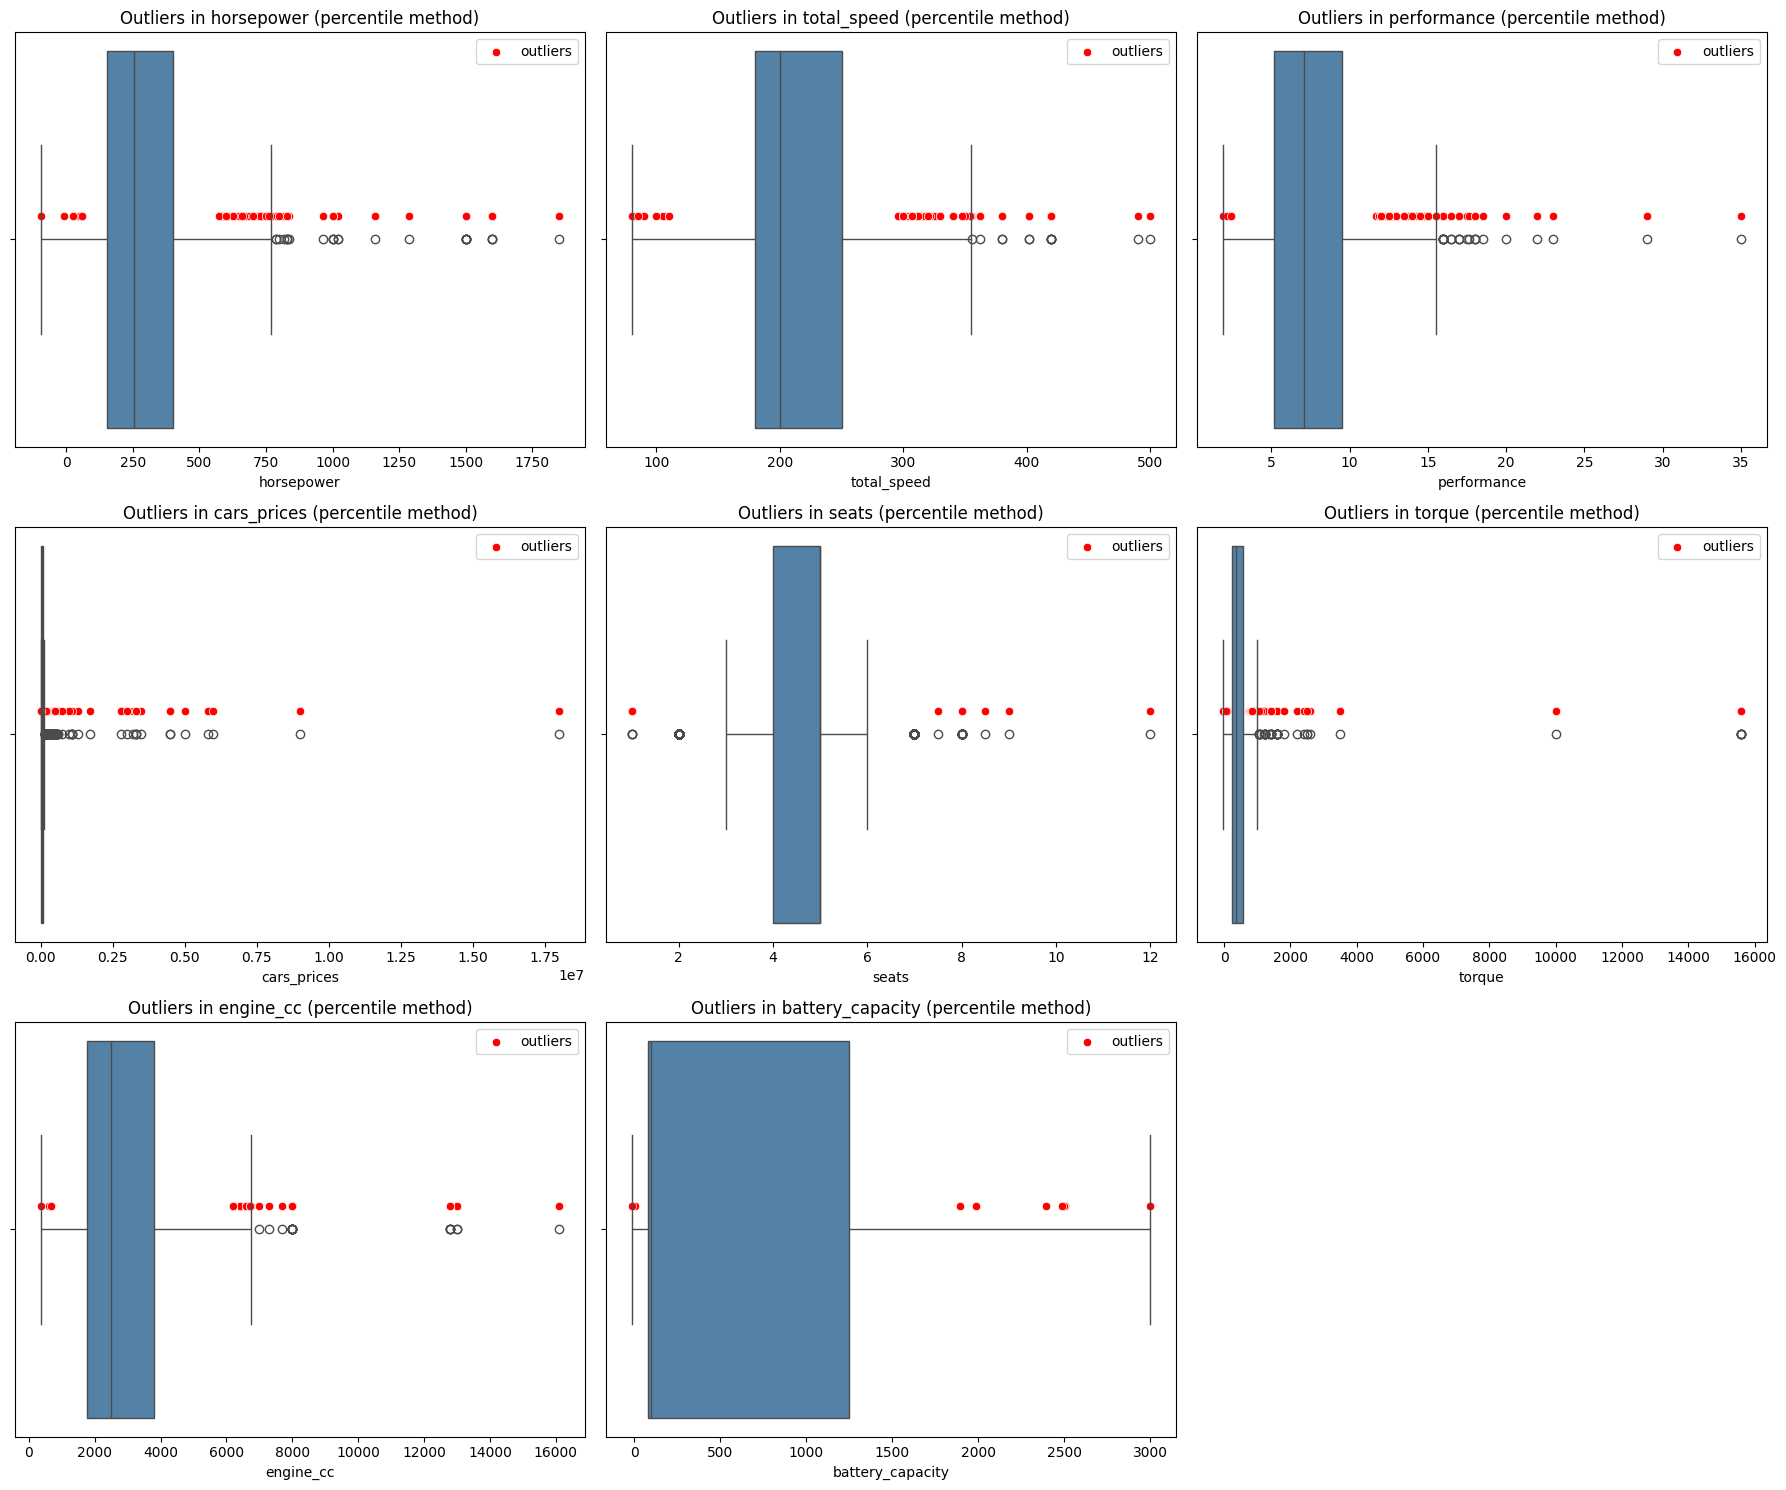

In [105]:
# Detect outliers with percentile method
outlier_flags = handler.detect_outliers_all(
    method="percentile", lower_percentile=0.01, upper_percentile=0.90
)

# Get numeric columns
numeric_cols = handler.df.select_dtypes(include="number").columns
n_cols = len(numeric_cols)

# Grid layout: 3 plots per row
n_rows = (n_cols + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))  # larger grid
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Full boxplot
    sns.boxplot(data=handler.df, x=col, color="steelblue", ax=axes[i])

    # Overlay outliers in red
    mask = outlier_flags[col]
    sns.scatterplot(
        x=handler.df[col][mask],
        y=[-0.05]*mask.sum(),   # jitter so they appear just below the box
        color="red",
        marker="o",
        ax=axes[i],
        label="outliers"
    )

    axes[i].set_title(f"Outliers in {col} (percentile method)", fontsize=12)
    axes[i].legend()

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [106]:
electric_gas_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1204 entries, 0 to 1217
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_names  1204 non-null   object 
 1   cars_names     1204 non-null   object 
 2   engines        1204 non-null   object 
 3   horsepower     1204 non-null   float64
 4   total_speed    1204 non-null   float64
 5   performance    1204 non-null   float64
 6   cars_prices    1204 non-null   float64
 7   fuel_types     1204 non-null   object 
 8   seats          1204 non-null   float64
 9   torque         1204 non-null   float64
dtypes: float64(6), object(4)
memory usage: 103.5+ KB


In [107]:
electric_cars_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 139 to 1217
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_names     177 non-null    object 
 1   cars_names        177 non-null    object 
 2   engines           177 non-null    object 
 3   horsepower        177 non-null    float64
 4   total_speed       177 non-null    float64
 5   performance       177 non-null    float64
 6   cars_prices       177 non-null    float64
 7   fuel_types        177 non-null    object 
 8   seats             177 non-null    float64
 9   torque            177 non-null    float64
 10  battery_capacity  177 non-null    float64
dtypes: float64(7), object(4)
memory usage: 16.6+ KB


In [108]:
gas_cars_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1025 entries, 0 to 1212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_names  1025 non-null   object 
 1   cars_names     1025 non-null   object 
 2   engines        1025 non-null   object 
 3   horsepower     1025 non-null   float64
 4   total_speed    1025 non-null   float64
 5   performance    1025 non-null   float64
 6   cars_prices    1025 non-null   float64
 7   fuel_types     1025 non-null   object 
 8   seats          1025 non-null   float64
 9   torque         1025 non-null   float64
 10  engine_cc      1025 non-null   float64
dtypes: float64(7), object(4)
memory usage: 96.1+ KB
